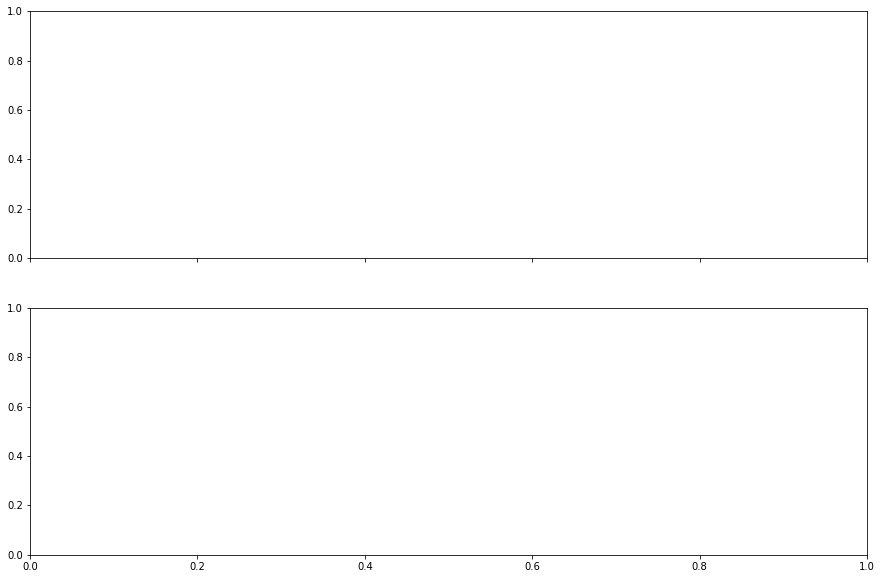

In [34]:
import csv
from matplotlib import pyplot as plt
%matplotlib inline


def load_csv(filename):
    result = []
    with open(filename, 'rt', newline='') as fd:
        rows = csv.reader(fd, delimiter='\t')
        for row in rows:
            result.append(row)
    return result


def preprocessing(volt_string, current_string):
    volts    = volt_string.split(',')
    currents = current_string.split(',')    

    volts    = [float(e) for e in volts]
    currents = [float(e) for e in currents]

    max_volt    = max(volts)
    max_current = max(currents)

    volts    = [float(e/max_volt) for e in volts]
    currents = [float(e/max_current) for e in currents]
    
    return volts, currents
    

fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
fig.set_figheight(10)
fig.set_figwidth(15) 


ng_rows = load_csv('IVData_1_NG.txt')
ngcurves = []
for row in ng_rows[1:]:
    volts, currents = preprocessing(row[0], row[1])
    ngcurves.append([volts, currents])
    #ax[0].plot(volts, currents)
    #ax[0].set_title('NG')
    
    
ok_rows = load_csv('IVData_ALL_OK.txt')
okcurves = []
for row in ok_rows[1:]:
    volts, currents = preprocessing(row[0], row[1])
    okcurves.append([volts, currents])
    #ax[1].plot(volts, currents)
    #ax[1].set_title('normal')


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

ngcurves = np.array(ngcurves)
print(ngcurves.shape)
ngcurves = ngcurves[..., np.newaxis]
print(ngcurves.shape)
ngcurves_y = np.full((ngcurves.shape[0], 1), 1)
print(ngcurves_y.shape)
print('-------------')

okcurves = np.array(okcurves)
print(okcurves.shape)
okcurves = okcurves[..., np.newaxis]
print(okcurves.shape)
okcurves_y = np.full((okcurves.shape[0], 1), 0)
print(okcurves_y.shape)

print('-------------')
all_x = np.vstack((ngcurves, okcurves))
all_y = np.vstack((ngcurves_y, okcurves_y))
print(all_x.shape)
print(all_y.shape)

print('-------------')
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=87)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1072, 2, 128)
(1072, 2, 128, 1)
(1072, 1)
-------------
(1007, 2, 128)
(1007, 2, 128, 1)
(1007, 1)
-------------
(2079, 2, 128, 1)
(2079, 1)
-------------
(1663, 2, 128, 1)
(416, 2, 128, 1)
(1663, 1)
(416, 1)


In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (2, 4), activation='relu', padding='SAME', input_shape=(2, 128, 1)))
model.add(layers.MaxPooling2D((1, 4)))

model.add(layers.Conv2D(64, (2, 4), activation='relu', padding='SAME'))
model.add(layers.MaxPooling2D((1, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='SAME'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 2, 128, 32)        288       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 32, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 32, 64)         16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 16, 64)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 16, 64)         16448     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [37]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_test, y_test))

Epoch 1/100
52/52 [==============================] - 1s 10ms/step - loss: 0.4538 - accuracy: 0.8004 - val_accuracy: 0.8534 - val_loss: 0.3362
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.3033 - accuracy: 0.8743 - val_accuracy: 0.8678 - val_loss: 0.2927
Epoch 3/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2393 - accuracy: 0.9104 - val_accuracy: 0.9351 - val_loss: 0.2133
Epoch 4/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1794 - accuracy: 0.9375 - val_accuracy: 0.9062 - val_loss: 0.1941
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1554 - accuracy: 0.9513 - val_accuracy: 0.9543 - val_loss: 0.1248
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1396 - accuracy: 0.9513 - val_accuracy: 0.9231 - val_loss: 0.1808
Epoch 7/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1083 - accuracy: 0.9603 - val_accuracy: 0.9375 - val_loss: 0.1574
Epoch 8/100


52/52 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.9886 - val_accuracy: 0.9736 - val_loss: 0.0514
Epoch 59/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0328 - accuracy: 0.9880 - val_accuracy: 0.9880 - val_loss: 0.0355
Epoch 60/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0260 - accuracy: 0.9922 - val_accuracy: 0.9784 - val_loss: 0.0457
Epoch 61/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9910 - val_accuracy: 0.9904 - val_loss: 0.0432
Epoch 62/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.9922 - val_accuracy: 0.9904 - val_loss: 0.0247
Epoch 63/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0289 - accuracy: 0.9910 - val_accuracy: 0.9904 - val_loss: 0.0261
Epoch 64/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0355 - accuracy: 0.9904 - val_accuracy: 0.9784 - val_loss: 0.0472
Epoch 65/100
52/52 

13/13 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9760
準確率:0.9759615659713745


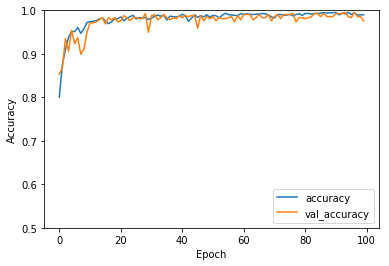

In [38]:
#plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)
print ("準確率:{}".format(test_acc))

In [39]:
#輸入實際曲線運算
#preds = model.predict_classes(x_test)
preds = np.argmax(model.predict(x_test), axis=-1)
print (preds)
#print (y_test[:,0])

[0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0]
